### Use Dummy Variables for Categorical Variables

#### Identifying Categorical Variables

How many categories of bedroom or bathroom do you have?\
How many numeric values do you have?\
How do you interpret it?\
With every one additional bathroom, you might expect the house price to increase by _____.\
Does this approach make sense for other variables?

In [58]:
categorical = df_data[['floors', 'waterfront', 'condition', 'grade', 'yr_renovated', 'zipcode', 'price']]
categorical

,floors,waterfront,condition,grade,yr_renovated,zipcode,price
1,2.0,0.0,3,7,1991.0,98125,538000.0
2,1.0,0.0,3,6,NaN,98028,180000.0
3,1.0,0.0,5,7,0.0,98136,604000.0
4,1.0,0.0,3,8,0.0,98074,510000.0
5,1.0,0.0,3,11,0.0,98053,1230000.0
...,...,...,...,...,...,...,...
21591,2.0,0.0,3,8,0.0,98116,475000.0
21592,3.0,0.0,3,8,0.0,98103,360000.0
21593,2.0,0.0,3,8,0.0,98146,400000.0
21594,2.0,0.0,3,7,0.0,98144,402101.0


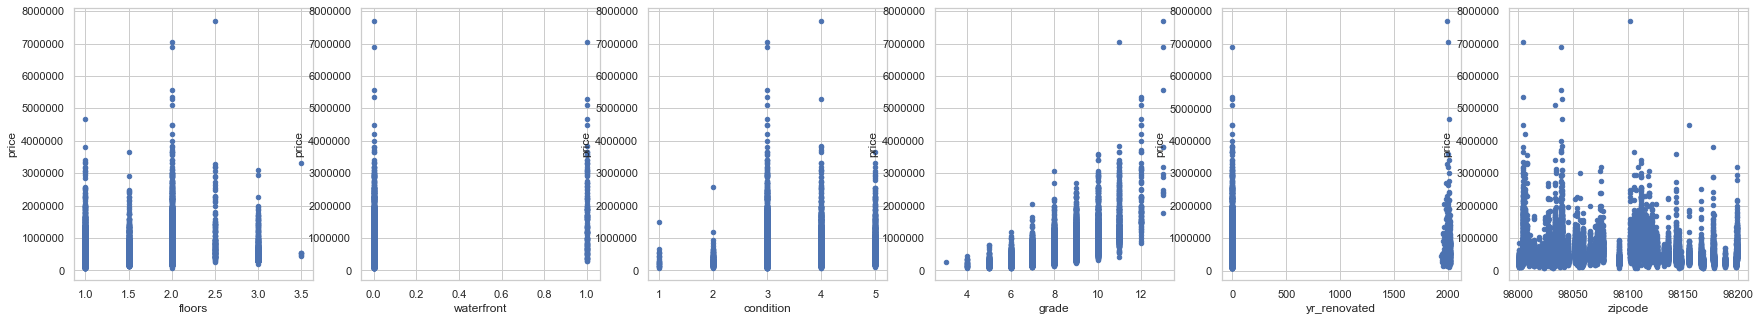

In [65]:
#method from learn
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(30,5))

for xcol, ax in zip(['floors', 'waterfront', 'condition', 'grade', 'yr_renovated', 'zipcode'], axes):
    categorical.plot(kind='scatter', x=xcol, y='price', ax=ax, color='b')

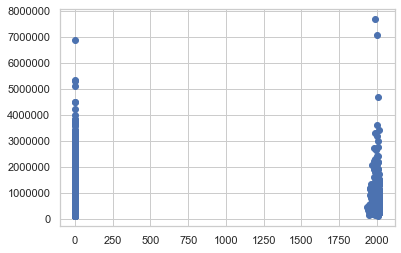

In [72]:
plt.scatter(df_data['yr_renovated'], df_data['price']);

In [71]:
df_data['price']

1         538000.0
2         180000.0
3         604000.0
4         510000.0
5        1230000.0
           ...    
21591     475000.0
21592     360000.0
21593     400000.0
21594     402101.0
21596     325000.0
Name: price, Length: 18804, dtype: float64

In [ ]:
# THIS CODE IS NOT WORKING - for reference only.

# method of plotting above scatters using for loop and enumerate is similar to this code.
for i, (key, categorical) in enumerate(gb):
    categorical.plot(ax=axes[0][i])


for i, (key, df2) in enumerate(gb):
    df2.plot(ax=axes[0][i])

In [9]:
#making categories

floors = ['One Fl', 'Two Fl', 'Three or more Fl']
floors_cat = pd.Series(floors).astype('category')

# no cats needed for waterfront. Add column.
# 1 = waterfront
# 0 = inland

# drop one column for each column

# 1 = Poor
# 2 = Fair
# 3 = Good
# 4 = Excellent
# 5 = Luxury
conditions = ['Poor', 'Fair', 'Good', 'Excellent', 'Luxury']
conditions_cat = pd.Series(conditions).astype('category')

# under 6 = mostly flat
# 6-9 = low slope
# 9-12 = hilly
# 12+ = steep
grades = ['Flat', 'Low Slope', 'Hilly', 'Steep']
grades_cat = pd.Series(grades).astype('category')

renovates = ['Not Renovated', 'Prior to 2000', '2000 to Present']
renovates_cat = pd.Series(renovates).astype('category')

zips = ['urban', 'nonurban']
zips_cat = pd.Series(zips).astype('category')

In [104]:
zips_cat

0       urban
1    nonurban
dtype: category
Categories (2, object): [nonurban, urban]

In [16]:
floor_dum = pd.get_dummies(df_data['floors'], prefix='floors', drop_first=True)
waterfront_dum= pd.get_dummies(df_data['waterfront'], prefix='wf', drop_first=True)                                   
condition_dum = pd.get_dummies(df_data['condition'], prefix='cond', drop_first=True)
grades_dum = pd.get_dummies(df_data['grade'], prefix='grade', drop_first=True)


#renovate_dum = pd.get_dummies(df_data['yr_renovated'], prefix='reno', drop_first=True)
#zips_dum = pd.get_dummies(df_data['zipcode'], prefix='zip', drop_first=True)

# Bobby I am waiting to do the dummies for zips and renos. When I did it this way it made 
# a new column for each zip, and a new column for each reno year. This is not what I wanted. 
# It might be okay, but I'm not sure.

In [17]:
df_data = df_data.drop(['waterfront', 'floors', 'condition', 'grade'], axis=1)

In [19]:
df_data = pd.concat([df_data, floor_dum, waterfront_dum, condition_dum, grades_dum], axis=1)
df_data.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,...,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
1,538000.0,3,2.25,2570,7242,2170,400,1951,1991.0,98125,...,0,0,0,1,0,0,0,0,0,0
2,180000.0,2,1.00,770,10000,770,0,1933,NaN,98028,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960,5000,1050,910,1965,0.0,98136,...,0,0,0,1,0,0,0,0,0,0


In [75]:
# Making dataframe for zipcode categories

urban = [98177, 98117, 98107, 98199, 98119, 98109, 98103, 98133, 98125, 98155, 98115,
         98105, 98112, 98102, 98122, 98144, 98108, 98118, 98116, 98121, 98101, 98154, 
         98104, 98134, 98106, 98126, 98136, 98146, 98168, 98178]

In [82]:
def urban_zip(i):
    if i in urban:
        return 1
    else:
        return 0

In [81]:
# THIS CODE IS NOT WORKING

#add a column for urban and non-urban
df_data = df_data.assign(urban= lambda i: urban_zip(i)) 

#for i in df_data['zipcode']:
    

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().